<a href="https://colab.research.google.com/github/Tonge-Shim/pytorchstudy/blob/main/chap5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

#celcius -> fahrenheit
w = 5.5556, b = -17.7778

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

parameters will be pytorch scalars(zero-dimensional tensors)

In [10]:
def model(t_u, w, b):
    return w * t_u +b
#mean square loss
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()
#initialize parameters
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
print(t_p)
loss = loss_fn(t_p, t_c)
print(loss)


tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])
tensor(1763.8848)


In [8]:
#delta에 따른 차이는?
delta = 0.1
loss_rate_of_change_w = (loss_fn(model(t_u, w+delta, b), t_c) - loss_fn(model(t_u, w-delta, b), t_c)) / (2.0*delta)
loss_rate_of_change_b = (loss_fn(model(t_u, w, b+delta), t_c) - loss_fn(model(t_u, w, b-delta), t_c)) / (2.0*delta)

In [9]:
learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w
b = b - learning_rate * loss_rate_of_change_b

#*the gradient*
compute the individual derivatives of the loss with respect to each parameter and put them in a vector of defivatives: the gradient.

In [12]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2*(t_p-t_c) / t_p.size(0)
    return dsq_diffs
def dmodel_dw(t_u, w, b):
    return t_u
def dmodel_db(t_u, w, b):
    return 1.0
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])#what is this stack function?



In [22]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w,b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)

        params = params - learning_rate * grad

        #print("Epoch %d, Loss %f" % (epoch, float(loss)))
    return params



In [26]:
training_loop(n_epochs = 100, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0]), t_u = t_u, t_c = t_c)
#망...

tensor([nan, nan])

In [25]:
training_loop(n_epochs = 100, learning_rate = 1e-4, params = torch.tensor([1.0, 0.0]), t_u = t_u, t_c = t_c)


tensor([ 0.2327, -0.0438])

#changing the inputs so that the gradients aren't quite so different

In [17]:
t_un = 0.1 * t_u#normalized --> t_u + n

In [24]:
training_loop(n_epochs = 100, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0]), t_u = t_un, t_c = t_c)


tensor([ 2.7553, -2.5162])

#epoch up

In [31]:
params = training_loop(n_epochs = 5000, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0]), t_u = t_un, t_c = t_c)
#nice

#visualizing

In [40]:
%matplotlib inline
from matplotlib import pyplot as plt

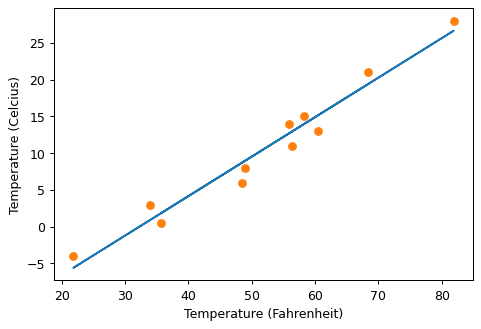

In [47]:
t_p = model(t_un, *params)#unpacking
fig = plt.figure(dpi = 90)#이게 뭐고/size maybe
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Temperature (Celcius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())#result
plt.plot(t_u.numpy(), t_c.numpy(), 'o')#inputs

#Autograd

In [53]:
params = torch.tensor([1.0, 0.0], requires_grad = True)
#requires_grad = True: track the entire family tree of tensors resulting 
#from operations on parmas.

In [50]:
params.grad is None

True

In [54]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad

tensor([4517.2969,   82.6000])